In [189]:
#import necessary packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [190]:
#obtain competitions available
free_comps = sb.competitions()
free_comps

# Euro 2024 matches
euro_2024 = sb.matches(competition_id=55, season_id=282).sort_values(by='match_date')
euro_2024.head()

# # Define Team
# team = "Portugal"

# # Filter matches
# matches_df = euro_2024[(euro_2024['home_team'] == team) | (euro_2024['away_team'] == team)]
# matches_df = matches_df.sort_values(by='match_date', ascending=False)

# # match id
# latest_match_id = matches_df.match_id.iloc[0]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
50,3930158,2024-06-14,22:00:00.000,Europe - UEFA Euro,2024,Germany,Scotland,5,1,available,...,2024-07-04T08:13:19.028344,1,Group Stage,Allianz Arena,Clément Turpin,Julian Nagelsmann,Steve Clarke,1.1.0,2,2
48,3930160,2024-06-15,19:00:00.000,Europe - UEFA Euro,2024,Spain,Croatia,3,0,available,...,2024-07-12T03:40:20.513429,1,Group Stage,Olympiastadion Berlin,Michael Oliver,Luis de la Fuente Castillo,Zlatko Dalić,1.1.0,2,2
28,3930161,2024-06-15,22:00:00.000,Europe - UEFA Euro,2024,Italy,Albania,2,1,available,...,2024-07-12T05:16:16.043874,1,Group Stage,Signal-Iduna-Park,Felix Zwayer,Luciano Spalletti,Sylvio Mendes Campos Junior,1.1.0,2,2
49,3930159,2024-06-15,16:00:00.000,Europe - UEFA Euro,2024,Hungary,Switzerland,1,3,available,...,2024-07-10T13:35:35.263551,1,Group Stage,RheinEnergieStadion,Slavko Vinčić,Marco Rossi,Murat Yakin,1.1.0,2,2
47,3930162,2024-06-16,19:00:00.000,Europe - UEFA Euro,2024,Slovenia,Denmark,1,1,available,...,2024-07-10T16:09:27.468163,1,Group Stage,MHPArena,Sandro Schärer,Matjaž Kek,Kasper Hjulmand,1.1.0,2,2


In [191]:
#Filter the matches we want
portugal_matches = euro_2024.loc[(euro_2024['home_team'] == 'Portugal')|(euro_2024['away_team'] == 'Portugal')]
portugal_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
45,3930166,2024-06-18,22:00:00.000,Europe - UEFA Euro,2024,Portugal,Czech Republic,2,1,available,...,2024-07-10T14:54:55.319751,1,Group Stage,Red Bull Arena,Marco Guida,Roberto Martínez Montoliú,Ivan Hašek,1.1.0,2,2
42,3930174,2024-06-22,19:00:00.000,Europe - UEFA Euro,2024,Turkey,Portugal,0,3,available,...,2024-07-11T16:43:45.852125,2,Group Stage,Signal-Iduna-Park,Felix Zwayer,Vincenzo Montella,Roberto Martínez Montoliú,1.1.0,2,2
34,3938644,2024-06-26,22:00:00.000,Europe - UEFA Euro,2024,Georgia,Portugal,2,0,available,...,2024-07-12T05:42:21.069872,3,Group Stage,VELTINS-Arena,Sandro Schärer,Willy Sagnol,Roberto Martínez Montoliú,1.1.0,2,2
13,3941020,2024-07-01,22:00:00.000,Europe - UEFA Euro,2024,Portugal,Slovenia,0,0,available,...,2024-07-13T19:48:57.256302,4,Round of 16,Deutsche Bank Park,Daniele Orsato,Roberto Martínez Montoliú,Matjaž Kek,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [193]:
portugal_turkey = sb.events(match_id=3930174)
portugal_turkey.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Turkey,909,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Portugal,780,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Turkey,909,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Turkey,909,00:00:00.000,Half Start,NaN


## Continuing

In [194]:
portugal_turkey.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_de

In [195]:
passes = portugal_turkey[portugal_turkey['type']=='Pass']

In [196]:
#seperate the columns
passes[['x', 'y']] = passes['location'].apply(pd.Series)
passes[['pass_end_x', 'pass_end_y']] = passes['pass_end_location'].apply(pd.Series)
passes

/var/folders/kt/cqpygk3d7gx0pzq_gtpfh5d00000gn/T/ipykernel_8439/424449497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes[['x', 'y']] = passes['location'].apply(pd.Series)
/var/folders/kt/cqpygk3d7gx0pzq_gtpfh5d00000gn/T/ipykernel_8439/424449497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes[['x', 'y']] = passes['location'].apply(pd.Series)
/var/folders/kt/cqpygk3d7gx0pzq_gtpfh5d00000gn/T/ipykernel_8439/424449497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:00.442,Pass,NaN,60.0,40.0,42.8,30.8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:03.930,Pass,NaN,42.6,34.0,81.2,49.6
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Turkey,909,00:00:17.248,Pass,NaN,12.5,37.5,17.2,58.2
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Turkey,909,00:00:26.840,Pass,NaN,39.5,64.6,120.0,62.7
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:49.676,Pass,NaN,6.0,31.3,5.9,55.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Turkey,909,00:49:52.161,Pass,NaN,19.5,67.0,30.1,75.4
1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Turkey,909,00:49:54.688,Pass,NaN,30.1,74.8,29.5,58.3
1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Turkey,909,00:49:56.435,Pass,NaN,27.9,60.4,35.6,60.8
1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Turkey,909,00:49:57.412,Pass,NaN,35.6,60.4,32.2,49.9


In [197]:
passes_portugal = passes[(passes['team']=='Portugal')]
passes_turkey = passes[(passes['team']=='Turkey')]

passes_portugal

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:00.442,Pass,NaN,60.0,40.0,42.8,30.8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:03.930,Pass,NaN,42.6,34.0,81.2,49.6
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:49.676,Pass,NaN,6.0,31.3,5.9,55.3
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:52.650,Pass,NaN,3.9,55.4,4.2,19.9
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:55.814,Pass,NaN,4.8,19.9,17.3,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:11.821,Pass,NaN,18.1,6.0,18.4,10.3
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:14.000,Pass,NaN,21.3,4.9,42.8,5.3
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:17.311,Pass,True,53.8,6.2,79.5,7.2
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:22.990,Pass,NaN,83.8,13.5,75.0,62.9


In [198]:
passes_portugal['player'].unique()

array(['Bruno Miguel Borges Fernandes', 'Nuno Mendes',
       'Kléper Laveran Lima Ferreira', 'Rúben Santos Gato Alves Dias',
       'Rafael Alexandre Conceição Leão',
       'Bernardo Mota Veiga de Carvalho e Silva',
       'João Maria Lobo Alves Palhinha Gonçalves', 'Diogo Meireles Costa',
       'João Pedro Cavaco Cancelo', 'Vitor Machado Ferreira',
       'Cristiano Ronaldo dos Santos Aveiro',
       'Rúben Diogo Da Silva Neves', 'Pedro Lomba Neto',
       'Nélson Cabral Semedo',
       'António João Pereira Albuquerque Tavares Silva', 'João Neves'],
      dtype=object)

In [199]:
#Change names of players
passes_portugal['player'] = passes_portugal['player'].replace(['Bruno Miguel Borges Fernandes'],'Bruno Fernandes')
passes_portugal['player'] = passes_portugal['player'].replace(['Kléper Laveran Lima Ferreira'],'Pepe')
passes_portugal['player'] = passes_portugal['player'].replace(['Rúben Santos Gato Alves Dias'],'Rúben Dias')
passes_portugal['player'] = passes_portugal['player'].replace(['Rafael Alexandre Conceição Leão'],'Rafael Leão')
passes_portugal['player'] = passes_portugal['player'].replace(['Bernardo Mota Veiga de Carvalho e Silva'],'Bernardo Silva')
passes_portugal['player'] = passes_portugal['player'].replace(['João Maria Lobo Alves Palhinha Gonçalves'],'Palhinha')
passes_portugal['player'] = passes_portugal['player'].replace(['Diogo Meireles Costa'],'Diogo Costa')
passes_portugal['player'] = passes_portugal['player'].replace(['João Pedro Cavaco Cancelo'],'Cancelo')
passes_portugal['player'] = passes_portugal['player'].replace(['Vitor Machado Ferreira'],'Vitinha')
passes_portugal['player'] = passes_portugal['player'].replace(['Cristiano Ronaldo dos Santos Aveiro'],'Cristiano Ronaldo')
passes_portugal['player'] = passes_portugal['player'].replace(['Rúben Diogo Da Silva Neves'],'Rúben Neves')
passes_portugal['player'] = passes_portugal['player'].replace(['Pedro Lomba Neto'],'Pedro Neto')
passes_portugal['player'] = passes_portugal['player'].replace(['António João Pereira Albuquerque Tavares Silva'],'António Silva')
passes_portugal['player'] = passes_portugal['player'].replace(['Nélson Cabral Semedo'],'Nélson Semedo')


/var/folders/kt/cqpygk3d7gx0pzq_gtpfh5d00000gn/T/ipykernel_8439/4178387227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_portugal['player'] = passes_portugal['player'].replace(['Bruno Miguel Borges Fernandes'],'Bruno Fernandes')
/var/folders/kt/cqpygk3d7gx0pzq_gtpfh5d00000gn/T/ipykernel_8439/4178387227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_portugal['player'] = passes_portugal['player'].replace(['Kléper Laveran Lima Ferreira'],'Pepe')
/var/folders/kt/cqpygk3d7gx0pzq_gtpfh5d0

In [200]:
passes_portugal['player'].unique()

array(['Bruno Fernandes', 'Nuno Mendes', 'Pepe', 'Rúben Dias',
       'Rafael Leão', 'Bernardo Silva', 'Palhinha', 'Diogo Costa',
       'Cancelo', 'Vitinha', 'Cristiano Ronaldo', 'Rúben Neves',
       'Pedro Neto', 'Nélson Semedo', 'António Silva', 'João Neves'],
      dtype=object)

In [201]:
passes_portugal_total = passes_portugal.groupby(['player'])['player'].count().to_frame()
passes_portugal_total

,player
player,
António Silva,5
Bernardo Silva,56
Bruno Fernandes,42
Cancelo,52
Cristiano Ronaldo,17
Diogo Costa,46
João Neves,4
Nuno Mendes,62
Nélson Semedo,8


In [202]:
passes_portugal['pass_outcome'].unique()

array([nan, 'Incomplete', 'Out', 'Pass Offside', 'Unknown'], dtype=object)

In [203]:
complete = passes_portugal[passes_portugal['pass_outcome'].isnull()]
incomplete = passes_portugal[passes_portugal['pass_outcome'].notnull()]
complete

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:00.442,Pass,NaN,60.0,40.0,42.8,30.8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:03.930,Pass,NaN,42.6,34.0,81.2,49.6
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:49.676,Pass,NaN,6.0,31.3,5.9,55.3
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:52.650,Pass,NaN,3.9,55.4,4.2,19.9
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:00:55.814,Pass,NaN,4.8,19.9,17.3,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:11.821,Pass,NaN,18.1,6.0,18.4,10.3
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:14.000,Pass,NaN,21.3,4.9,42.8,5.3
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:17.311,Pass,True,53.8,6.2,79.5,7.2
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Portugal,780,00:49:22.990,Pass,NaN,83.8,13.5,75.0,62.9


In [204]:
#Aggregate the passes columns
passes_portugal_total['complete'] = complete.groupby(['player'])['player'].count().to_frame()
passes_portugal_total['incomplete'] = incomplete.groupby(['player'])['player'].count().to_frame()
passes_portugal_total = passes_portugal_total.fillna(0)
#passes_portugal_total.drop(columns=['level_0'])
passes_portugal_total

,player,complete,incomplete
player,,,
António Silva,5,5,0.0
Bernardo Silva,56,50,6.0
Bruno Fernandes,42,33,9.0
Cancelo,52,48,4.0
Cristiano Ronaldo,17,14,3.0
Diogo Costa,46,40,6.0
João Neves,4,4,0.0
Nuno Mendes,62,54,8.0
Nélson Semedo,8,7,1.0


In [206]:
#rename
#passes_portugal_total.columns.values[0] = 'total passes'
passes_portugal_total = passes_portugal_total.rename(columns={'player':'player'})
passes_portugal_total = passes_portugal_total.reset_index()

 # % 
passes_portugal_total['%'] = passes_portugal_total['complete']/passes_portugal_total['total passes']*100
passes_portugal_total = passes_portugal_total[passes_portugal_total['total passes']>=10]

passes_portugal_total


,player,total passes,complete,incomplete,%
1,Bernardo Silva,56,50,6.0,89.285714
2,Bruno Fernandes,42,33,9.0,78.571429
3,Cancelo,52,48,4.0,92.307692
4,Cristiano Ronaldo,17,14,3.0,82.352941
5,Diogo Costa,46,40,6.0,86.956522
7,Nuno Mendes,62,54,8.0,87.096774
9,Palhinha,22,21,1.0,95.454545
10,Pedro Neto,21,14,7.0,66.666667
11,Pepe,64,62,2.0,96.875000
12,Rafael Leão,17,12,5.0,70.588235


## VIZ THE DATA

In [207]:
#sorting values
#head() does the inverse of tail()
top_10 = passes_portugal_total.sort_values('%',ascending=True).tail(10)
top_10

,player,total passes,complete,incomplete,%
4,Cristiano Ronaldo,17,14,3.0,82.352941
14,Rúben Neves,35,30,5.0,85.714286
5,Diogo Costa,46,40,6.0,86.956522
7,Nuno Mendes,62,54,8.0,87.096774
1,Bernardo Silva,56,50,6.0,89.285714
15,Vitinha,62,56,6.0,90.322581
13,Rúben Dias,98,90,8.0,91.836735
3,Cancelo,52,48,4.0,92.307692
9,Palhinha,22,21,1.0,95.454545
11,Pepe,64,62,2.0,96.875000


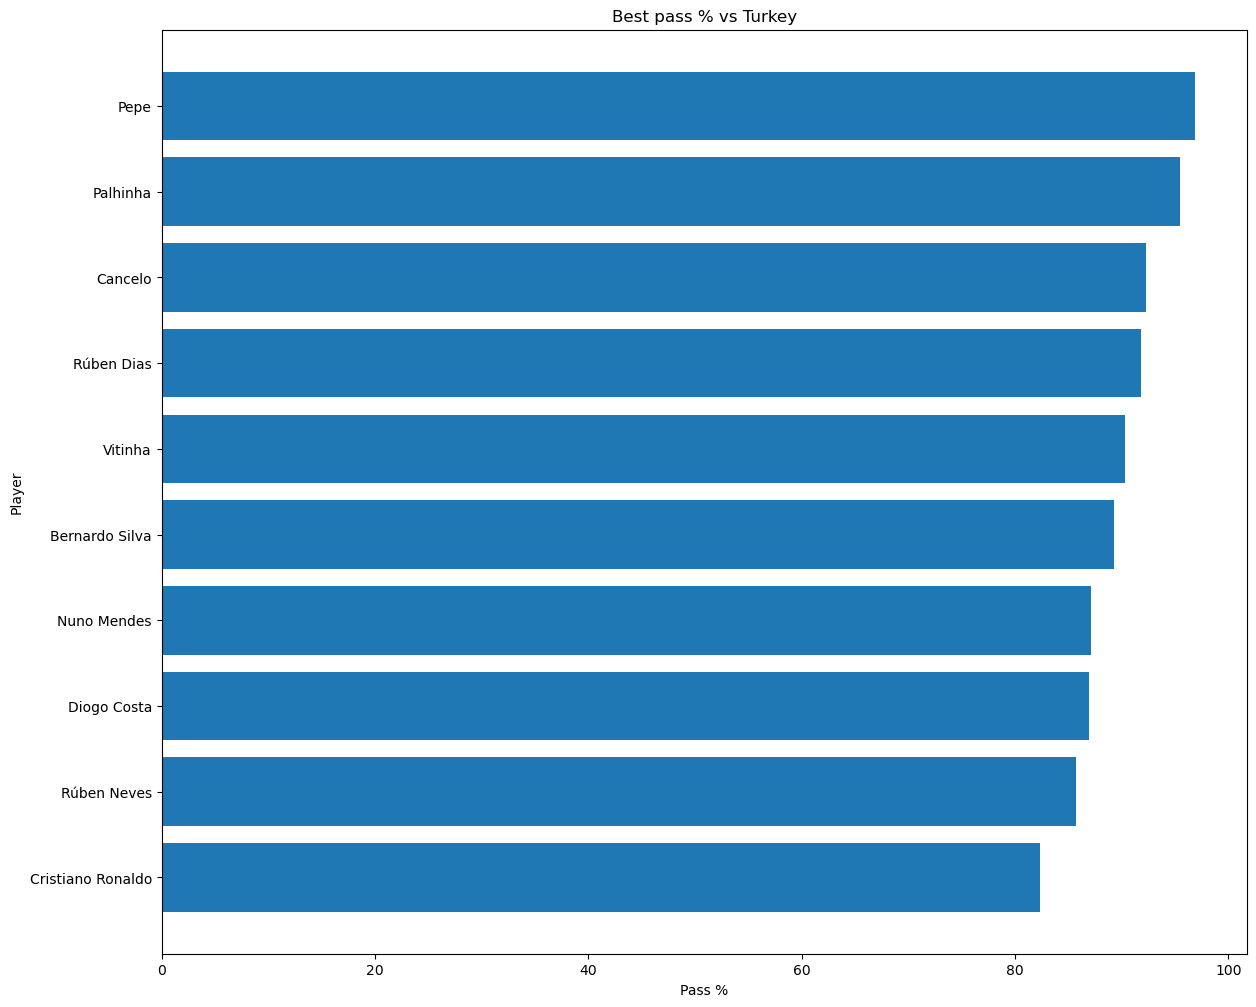

In [208]:
#Bar chart
fig = plt.figure(figsize=(14, 12))
ax = plt.axes()
ax.barh(top_10['player'],
       top_10['%'])
plt.title("Best pass % vs Turkey")
plt.xlabel("Pass %")
plt.ylabel("Player")
plt.show()

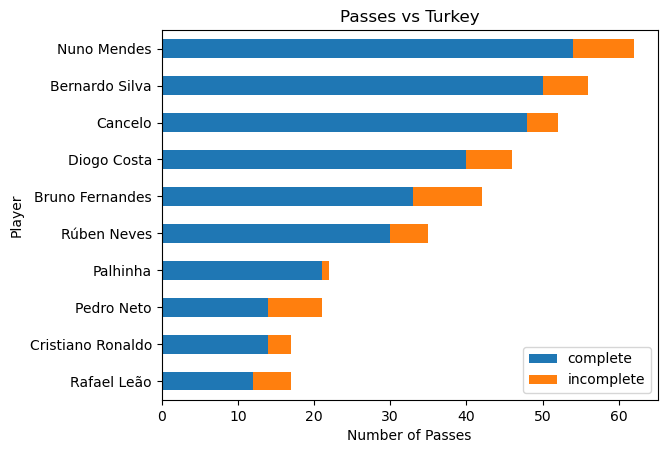

In [209]:
#stacked bar
ax = passes_portugal_total[['player','complete','incomplete']].sort_values('complete', 
                                 ascending = True).head(10).plot.barh(x='player',stacked=True)
plt.title("Passes vs Turkey")
plt.xlabel("Number of Passes")
plt.ylabel("Player")
plt.show()

## VIZ OF PASSES IN A FOOTBALL PITCH

In [210]:
white="white"
sbred='#e21017'
lightgrey="#d9d9d9"
darkgrey='#9A9A9A'
cmaplist = [white, darkgrey, sbred]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

In [211]:
#create a function to make pass map and heatmap

def passMap(player):
    player=player
    #Filter 
    comp=complete[(complete["player"]==player)]
    incomp=incomplete[(incomplete["player"]==player)]

    #plotting pitch
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    #CCounting the passes per zones
    bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

    #Pass graph 
    pitch.arrows(comp.x, comp.y,
    comp.pass_end_x, comp.pass_end_y, width=3,
    headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Completed Pass")
    pitch.arrows(incomp.x, incomp.y,
    incomp.pass_end_x, incomp.pass_end_y, width=3,
    headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label = "Missed Pass")

    #color 
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

    #title
    ax_title = ax.set_title('Passes of ' f'{player} vs Turkey', fontsize=30,color='black')
    
    plt.show()

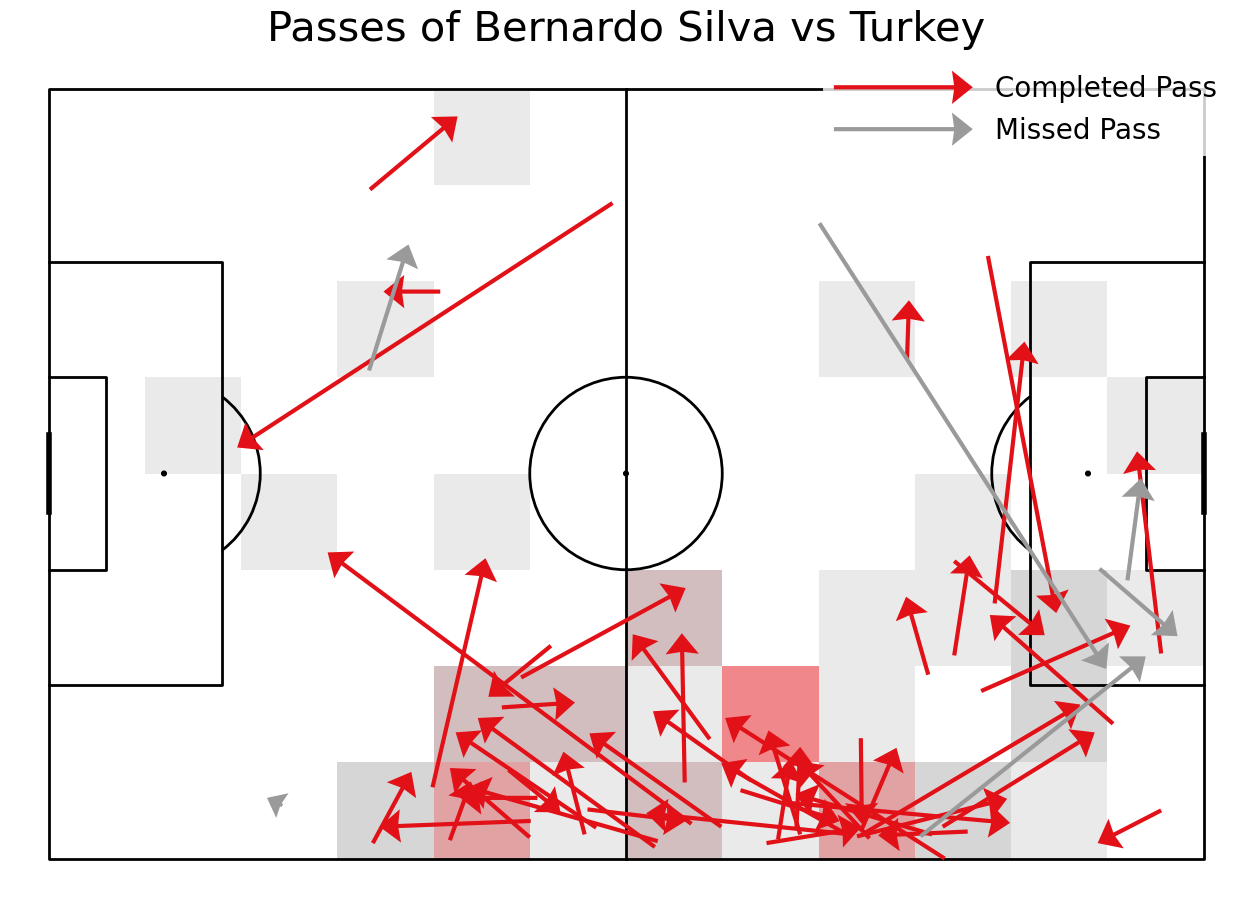

In [212]:
#define the player to show the plot
passMap('Bernardo Silva')

In [213]:
#pass map for several player
# for player in passes_portugal_total['player'].unique():
#     passMap(player)

# #VIZ PASSES TO THE LAST 3RD

In [214]:
#filter last 3rd passes
complete_f3 = complete[(complete['pass_end_x']>=80)]
incomplete_f3 = incomplete[(incomplete['pass_end_x']>=80)]

complete_f3 = complete_f3[(complete_f3['x']<80)]
incomplete_f3 = incomplete_f3[(incomplete_f3['x']<80)]

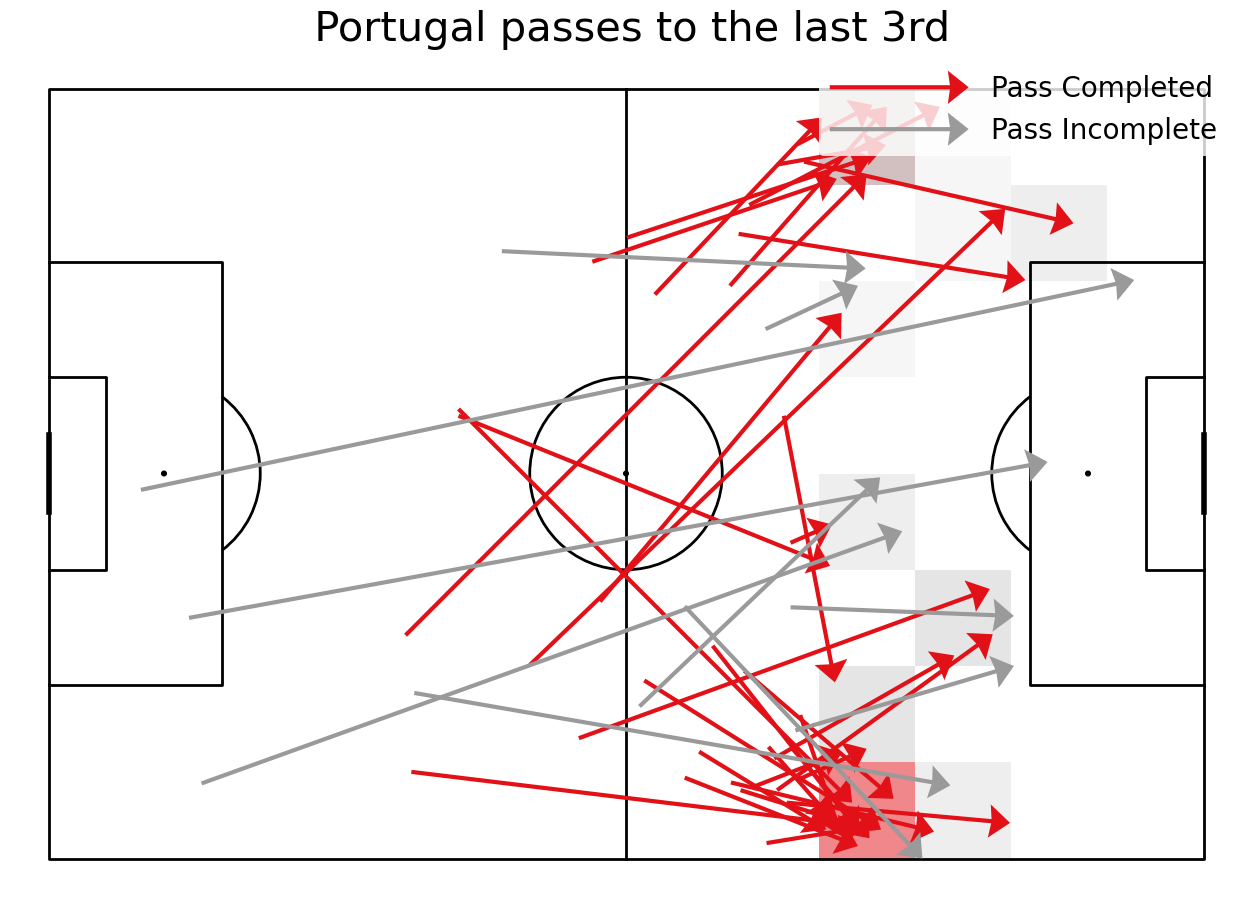

In [215]:
# Pitch VIZ

pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

pitch.arrows(complete_f3.x, complete_f3.y,
complete_f3.pass_end_x, complete_f3.pass_end_y, width=3,
headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Pass Completed")

pitch.arrows(incomplete_f3.x, incomplete_f3.y,
incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, width=3,
headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label = "Pass Incomplete")

ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_title = ax.set_title(' Portugal passes to the last 3rd', fontsize=30,color='black')
plt.show()


In [217]:
#Creating a function to check a specific player

def passMap_f3(player):
    
    player=player
    #Filtering the passes of a specific player
    comp=complete[(complete["player"]==player)]
    incomp=incomplete[(incomplete["player"]==player)]
    complete_f3 = comp[(complete["pass_end_x"]>=80)]
    incomplete_f3 = incomp[(incomplete["pass_end_x"]>=80)]
    complete_f3 = complete_f3[(complete_f3["x"]<80)]
    incomplete_f3 = incomplete_f3[(incomplete_f3["x"]<80)]

    #viz the pitch
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    #Counting the passes per zones 
    bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

    #Plot the arrows
    pitch.arrows(complete_f3.x, complete_f3.y,
    complete_f3.pass_end_x, complete_f3.pass_end_y, width=3,
    headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Pass Completed")
    pitch.arrows(incomplete_f3.x, incomplete_f3.y,
    incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, width=3,
    headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label = "Pass Incompleted")

    #Color palletes
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

    #Title
    ax_title = ax.set_title('Pass map of ' f'{player} vs Turkey into the last 3rd', fontsize=30,color='black')
    
    plt.show()

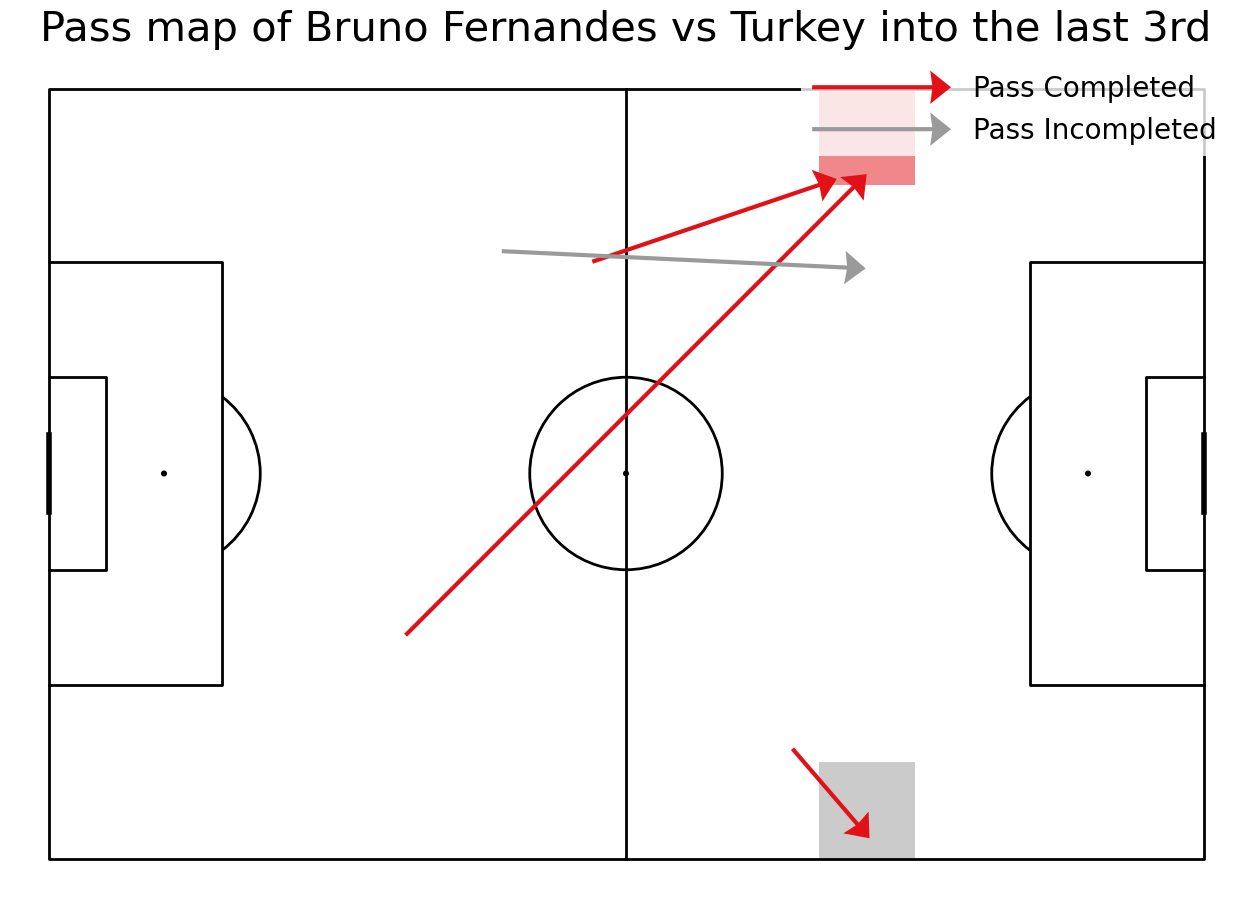

In [218]:
#Chosing the player
passMap_f3('Bruno Fernandes')

# # TEST With data to calculate % in the passes

In [219]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()]
sbred = "#D00027"
darkgrey = "#606060"

# Function to calculate and plot
def passMap_f3(player, complete, incomplete, match_title, subtitle):
    # Filter passes complete and incomplete
    comp = complete[(complete["player"] == player)]
    incomp = incomplete[(incomplete["player"] == player)]
    complete_f3 = comp[(comp["pass_end_x"] >= 80) & (comp["x"] < 80)]
    incomplete_f3 = incomp[(incomp["pass_end_x"] >= 80) & (incomp["x"] < 80)]

    # pitch configuration
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # count passes per zones
    bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    vmax = bin_statistic['statistic'].max()
    vmin = 0

    # Plot heatmap
    pitch.heatmap(bin_statistic, ax=ax, cmap=cmap, vmax=vmax, vmin=vmin, alpha=0.5)
    pitch.label_heatmap(bin_statistic, color='white', path_effects=path_eff, fontsize=20, ax=ax,
                        str_format='{:.0%}', ha='center', va='center', exclude_zeros=True)

    # Plot arrows 
    pitch.arrows(complete_f3.x, complete_f3.y,
                 complete_f3.pass_end_x, complete_f3.pass_end_y, width=3,
                 headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label="Pass Completed")
    pitch.arrows(incomplete_f3.x, incomplete_f3.y,
                 incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, width=3,
                 headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label="Pass Incompleted")

    # add caption
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

    # title & subtitle
    fig.suptitle(match_title, fontsize=40, style='italic')
    fig.text(0.5, 0.92, subtitle, ha='center', fontsize=14, style='italic')
    ax_text(90, 105, f'{player}: Passes', ha='left', textalign='left', c='black', va='center', fontsize=20, ax=ax, style='italic')

    plt.show()

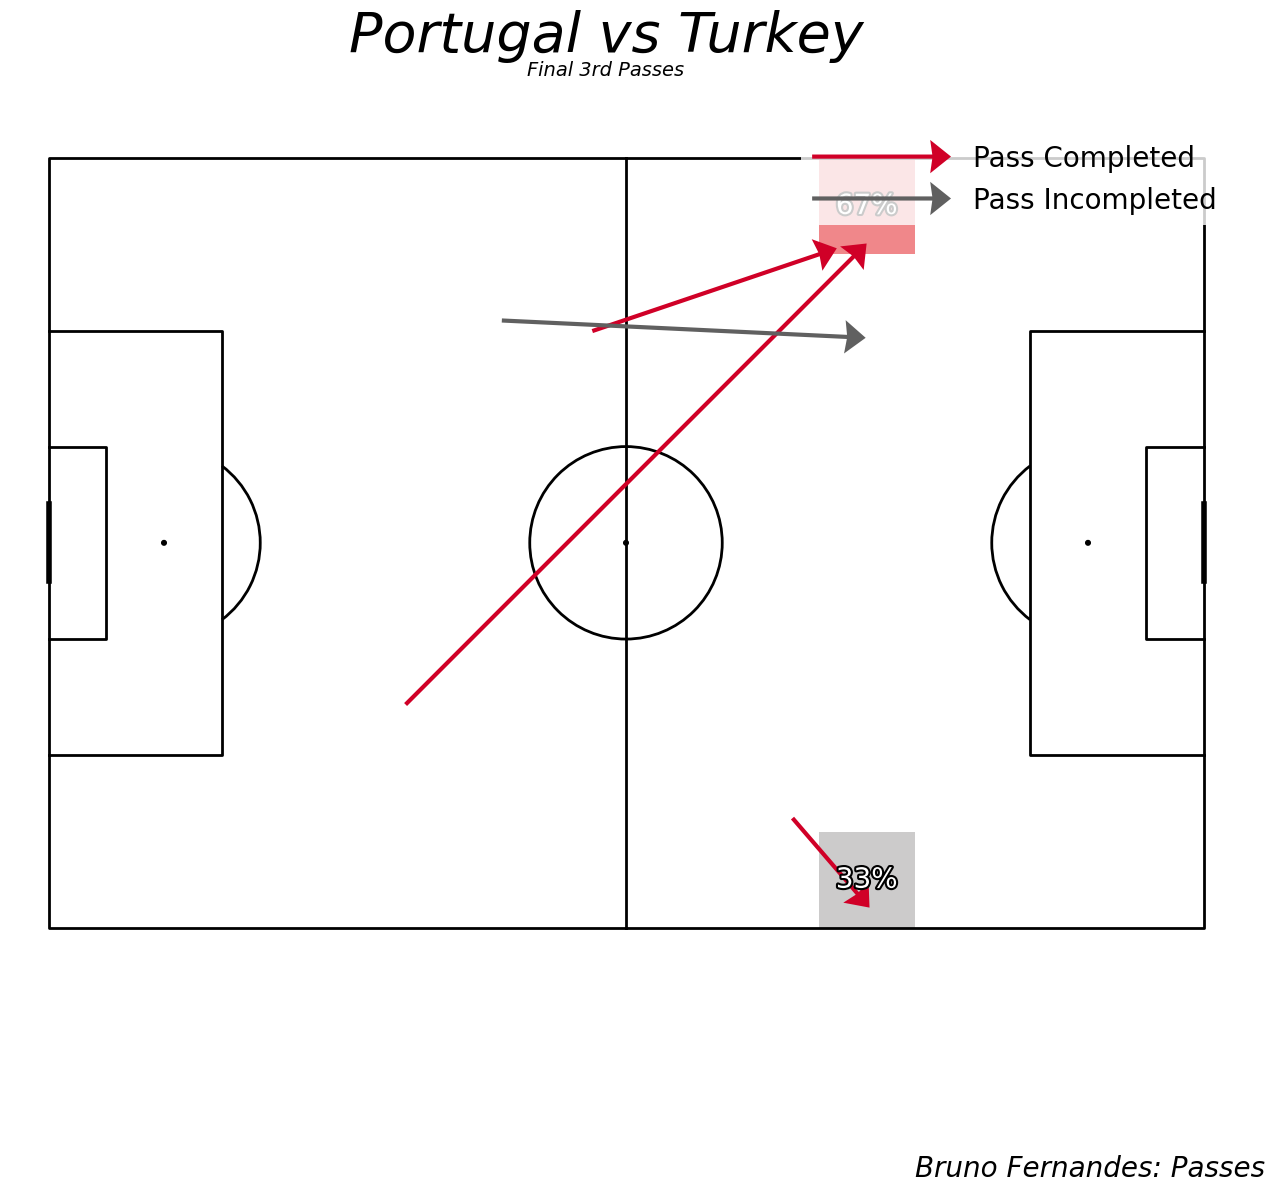

In [220]:
passMap_f3('Bruno Fernandes', complete, incomplete, 'Portugal vs Turkey', 'Final 3rd Passes')